In [1]:
!python --version

Python 3.8.5


In [2]:
import tensorflow as tf # Машинное обучение
import keras # API для TensorFlow
import numpy as np # Научные вычисления
import matplotlib.pyplot as plt # Визуализация 2D и 3D графики
import pandas as pd # Обработка и анализ данных
import matplotlib as mpl # Визуализация графиков
import random # Генерация псевдослучайных чисел для различных распределений
import seaborn as sns # Визуализация графиков (надстройка над matplotlib)
import pylab # Построение графиков

### Версии необходимых библиотек

In [3]:
pkgs = {
    'Package': ['TensorFlow', 'Keras', 'NumPy', 'Pandas', 'Matplotlib', 'Seaborn'],
    'Version': [i.__version__ for i in [tf, keras, np, pd, mpl, sns]]}

df_pkgs = pd.DataFrame(data = pkgs) # Версии используемых библиотек
df_pkgs.head(None).style.hide_index() # Отображение первых N строк или все если указать None

Package,Version
TensorFlow,2.3.1
Keras,2.4.3
NumPy,1.18.5
Pandas,1.1.3
Matplotlib,3.3.2
Seaborn,0.11.0


### Загрузка набора данных

In [4]:
mnist = keras.datasets.fashion_mnist # Загрузка набора данных Fashion-MNIST

### Разбиение набора данных на обучающие и тестовые выборки

In [5]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

### Отображение изображений из обучающей выборки

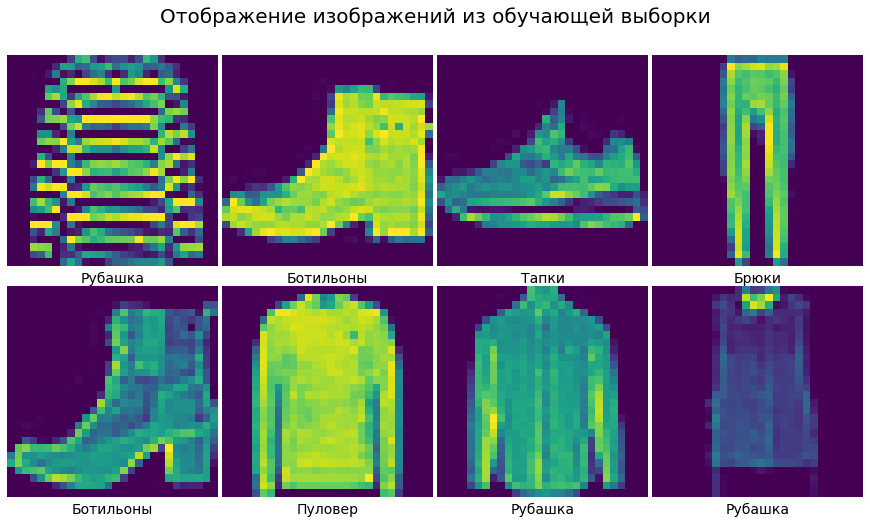

In [6]:
nrows = 2 # Количество строк
ncols = 4 # Количество столбцов

counts = 8 # Количество случайных значений из обучающен набора данных

# Имена классов
titles_data = ['Футболка/топ', 'Брюки', 'Пуловер', 'Платье', 'Пальто', 'Сандалии', 'Рубашка', 'Тапки', 'Сумка', 'Ботильоны']

fig = plt.gcf() # Создание фигуры
fig.set_size_inches(ncols * 3, nrows * 3.5) # Установка размера фигуры в дюймах

next_pix = random.sample(range(0, len(training_images)), counts) # Случайные номера изображений из обучающего набора

for i, num in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Отключение осей
    
    t = titles_data[training_labels[num]]
    
    plt.imshow(training_images[num])
    
    plt.title('{}'.format(t), y = -0.11, fontsize = 14, color = '#000000')

plt.suptitle(
    'Отображение изображений из обучающей выборки', # Заголовок
    fontsize = 20, # Размер заголовка
    fontdict = {
        'color': '#000000' # Цвет заголовка
    },
    y = 1.01 # Отступ заголовка от вершины осей
)

plt.tight_layout(pad = 0.4) # Установка расстояния между осями

plt.show() # Отображение фигуры

### Визуализация выборок

In [7]:
def _countplot(df, pad):
    """
    График подсчета количества элементов в каждом классе

    (pandas.core.frame.DataFrame, int) -> None

    Аргументы:
        df - Данные
        pad - Отступ от ряда до его значения

    Возвращает: None
    """

    # Создание новой фигуры
    plt.figure(
        figsize = (10, 7) # Размер фигуры в дюймах
    )

    ax = plt.axes() # Добавление осей к текущей фигуре
    ax.xaxis.tick_bottom() # Перемещение меток в нижнюю часть

    # Количество элементов в каждом классе
    ax = sns.countplot(df.label, label = 'Количество')
    
    counts = df.groupby(df.label)['label'].count().index.tolist()

    i = 0

    for p in ax.patches:
        height = p.get_height()

        ax.text(
            p.get_x() + p.get_width() / 2.0, # X позиция размещения текста
            height + pad, # Y позиция размещения текста
            df.label.value_counts()[counts[i]], # Текст
            ha = 'center', # Выравнивание
            fontdict = {
                'fontsize': 14, # Размер заголовка
                'color': '#000000' # Цвет заголовка
            },
        )

        i += 1

    # Изменение внешнего вида меток
    ax.tick_params(
        axis = 'x', # Ось
        direction = 'out', # Расположение линий меток
        length = 10, # Длина линий меток
        width = 1, # Ширина линий меток 
        color = '#000000', # Цвет линий меток
        pad = 5, # Расстояние между линиями меток и метками
        labelsize = 14, # Размер метки
        labelcolor = '#000000', # Цвет метки
        bottom = True,  # Рисование линий меток
    )
    ax.tick_params(
        axis = 'y', # Ось
        direction = 'out', # Расположение линий меток
        length = 10, # Длина линий меток
        width = 1, # Ширина линий меток 
        color = '#000000', # Цвет линий меток
        pad = 5, # Расстояние между линиями меток и метками
        labelsize = 14, # Размер метки
        labelcolor = '#000000', # Цвет метки
        left = True  # Рисование линий меток
    )

    # Заголовок осей
    ax.set_title(
        label = 'Количество элементов в каждом классе обучающей выборки', # Заголовок
        fontdict = {
            'fontsize': 18, # Размер заголовка
            'color': '#000000' # Цвет заголовка
        },
        pad = 10 # Отступ заголовка от вершины осей
    )

    # Изменение внешнего вида меток данных
    ax.set_xlabel(
        'Метки',
        fontsize = 14, # Размер метки
        fontdict = {
            'color': '#000000' # Цвет метки
        },
        labelpad = 10 # Отступ

    );
    ax.set_ylabel(
        'Количество',
        fontsize = 14, # Размер метки
        fontdict = {
            'color': '#000000' # Цвет метки
        },
        labelpad = 10 # Отступ
    );
    
    plt.show() # Отображение фигуры

#### График подсчета количества элементов в каждом классе

D:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


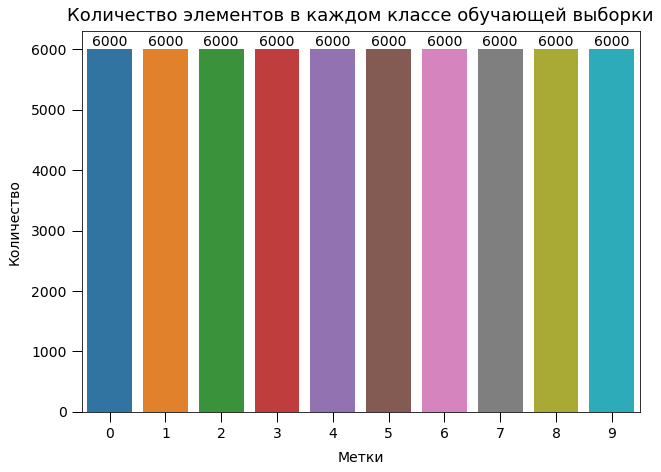

In [8]:
df = pd.DataFrame([pd.Series(training_labels)], index = ['label']).T

_countplot(df, 60)

### Формат обучающей и тестовой выборки

> `60000` - всего изображений; `28` - ширина; `28` - высота; `1` - глубина (полутоновые)

In [9]:
training_images_f = training_images.reshape(60000, 28, 28, 1)
test_images_f = test_images.reshape(10000, 28, 28, 1)

### Дополнительный импорт

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Формирование набора данных для TF

import os

### Предварительная обработка данных

In [11]:
# Аугментация
train_datagen = ImageDataGenerator(
    # Аугментация
    rotation_range = 40, # Диапазон углов поворота от 0 до 180 градусов, на который случайным образом поворачивается изображение
    width_shift_range = 0.3, # Сдвиг изображения по ширине
    height_shift_range = 0.3, # Сдвиг изображения по высоте
    shear_range = 0.3, # Искажение
    zoom_range = 0.3, # Увеличение/уменьшение изображения
    horizontal_flip = True, # Зеркальный поворот
    fill_mode = 'nearest', # Заливка пустых пикселей, который потеряны при аугментации
    rescale = 1 / 255 # Нормализация набора изображений и диапазона [0:255] в диапазоне [0:1]
)
test_datagen = ImageDataGenerator(rescale = 1 / 255) # Валидационная выборка

# Формирование обучающей выборки
train_generator = train_datagen.flow(
    training_images_f, # Обучающая выборка
    training_labels, # Метки классов
    batch_size = 32 # Размер выборки
)

# Формирование тестовой выборки
test_generator = test_datagen.flow(
    test_images_f, # Тестовая выборка
    test_labels, # Метки классов
    batch_size = 1, # Размер выборки
)

### Определение модели нейронной сети

In [12]:
# Модель с последовательными слоями в нейронной сети
model = keras.Sequential([
    # Сверточный слой
    keras.layers.Conv2D(
        32, # Количество фильтров
        (3, 3), # Размер свертки
        activation = tf.nn.relu, # Функция активации
        input_shape = (28, 28, 1) # Размер входных данных
    ),
    keras.layers.MaxPooling2D(2, 2), # Уменьшение размерности
    
    # Сверточный слой
    keras.layers.Conv2D(
        64, # Количество фильтров
        (3, 3), # Размер свертки
        activation = tf.nn.relu # Функция активации
    ),
    keras.layers.MaxPooling2D(2, 2), # Уменьшение размерности
    
    keras.layers.Flatten(), # Преобразование массива пикселей в вектор пикселей
    
    # Полносвязный скрытый слой
    keras.layers.Dense(
        units = 256, # Количество нейронов
        activation = tf.nn.relu # Функция активации
    ),
    # Полносвязный слой
    keras.layers.Dense(
        10, # Количество нейронов = количество классов
        activation = tf.nn.softmax # Функция активации
    )
])


### Построение модели нейронной сети

In [13]:
# Сборка модели
model.compile(
    # Оптимизатор
    optimizer = tf.keras.optimizers.RMSprop(
        lr = 0.0001 # Скорость обучения
    ),
    loss = 'sparse_categorical_crossentropy', # Функция потерь
    metrics = ['accuracy'] # Метрика оценивания
)

In [14]:
model.summary() # Визуализация модели

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

### Остановка процесса обучения

In [15]:
class myCallback(keras.callbacks.Callback):
    """
    Остановка процесса обучения
    """
    
    def on_epoch_end(self, epoch, logs = {}):
        # Сравнение точности на текущей эпохе
        if(logs.get('accuracy') > 0.99):
              self.model.stop_training = True # Остановка обучения

In [16]:
callbacks = myCallback() # Остановка процесса обучения

# Обучение модели
history = model.fit(
    train_generator, # Обучающая выборка
    steps_per_epoch = 1875, # Общее количество шагов
    epochs = 10, # Количество эпох
    verbose = True, # Отключение вывода
    callbacks = [callbacks] # Вызов функции после каждой эпохи
)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 1.5963 - accuracy: 0.4252
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 1.2774 - accuracy: 0.5377
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 1.1762 - accuracy: 0.5758
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 1.1088 - accuracy: 0.6021
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 1.0638 - accuracy: 0.6172
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 1.0216 - accuracy: 0.6329
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.9908 - accuracy: 0.64250s - loss: 0.9899 
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.9627 - accuracy: 0.6547
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.9370 - accuracy: 0.6630
Epoch 10/10
1875/1875 [=======================

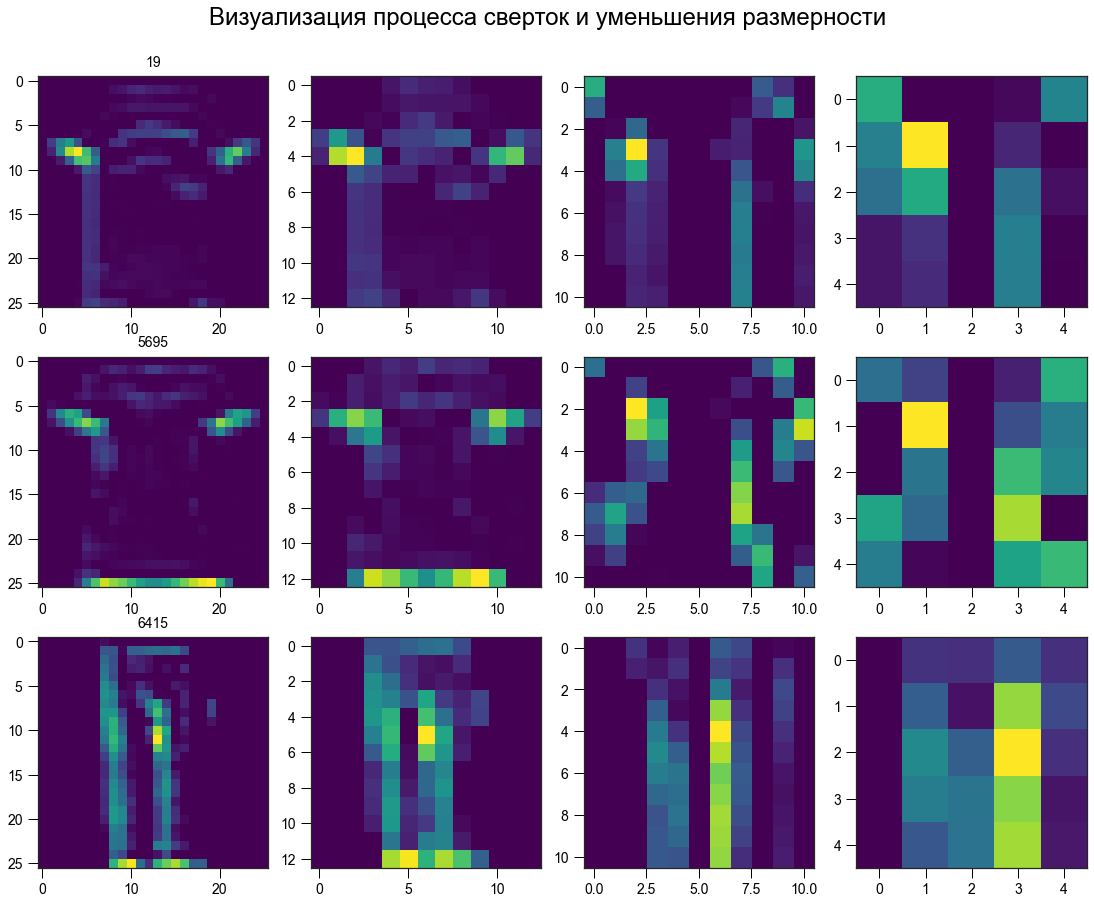

In [17]:
conv_num = 10 # Номер свертки
cols = 4 # Количество столбцов
rows = random.sample(range(0, len(test_images)), 3) # Количество строк (индексы меток классов)

layer_outputs = [layer.output for layer in model.layers] # Выходные слои

# Объединение слоев в объект с функциями обучения и вывода
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

# Создание новой фигуры
fig = plt.figure(
    figsize = (15, 12) # Размер фигуры в дюймах
)

# Установка эстетических параметров
sns.set(
    style = 'white', # Стиль
    palette = 'muted', # Пальтра
    color_codes = True
)
sns.despine(left = True)

# Цветовая палитра
cmap = 'viridis' # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

# Проход по всем столбцам
for i in range(0, cols):
    # Проход по всем строкам
    for j in range(0, len(rows)):
        # Создание оси в определенном месте внутри регулярной сетки
        ax = pylab.subplot2grid((len(rows), cols), (j, i))
        
        if i == 0:
            # Заголовок осей
            ax.set_title(
                label = rows[j], # Заголовок
                fontdict = {
                    'fontsize': 14, # Размер заголовка
                    'color': '#000000' # Цвет заголовка
                },
                pad = 10 # Отступ заголовка от вершины осей
            )
        
        # Изменение внешнего вида меток
        ax.tick_params(
            axis = 'x', # Ось
            direction = 'out', # Расположение линий меток
            length = 10, # Длина линий меток
            width = 1, # Ширина линий меток 
            color = '#000000', # Цвет линий меток
            pad = 5, # Расстояние между линиями меток и метками
            labelsize = 14, # Размер метки
            labelcolor = '#000000', # Цвет метки
            bottom = True,  # Рисование линий меток
        )
        ax.tick_params(
            axis = 'y', # Ось
            direction = 'out', # Расположение линий меток
            length = 10, # Длина линий меток
            width = 1, # Ширина линий меток 
            color = '#000000', # Цвет линий меток
            pad = 5, # Расстояние между линиями меток и метками
            labelsize = 14, # Размер метки
            labelcolor = '#000000', # Цвет метки
            left = True  # Рисование линий меток
        )
        
         # Предсказание
        f = activation_model.predict(test_images[rows[j]].reshape(1, 28, 28, 1))[i]
        
        # Отображение данных в виде изображения
        ax.imshow(f[0, : , :, conv_num], cmap = cmap)
        ax.grid(False) # Отключение сетки

# Заголовок фигуры
pylab.suptitle(
    t = 'Визуализация процесса сверток и уменьшения размерности', # Заголовок
    fontsize = 24, # Размер заголовка
    fontdict = {
        'color': '#000000' # Цвет заголовка
    },
    y = 1.03 # Отступ заголовка от вершины осей
)

fig.tight_layout(pad = 0) # Установка расстояния между осями

plt.show() # Отображение фигуры

### Визуализация процесса обучения

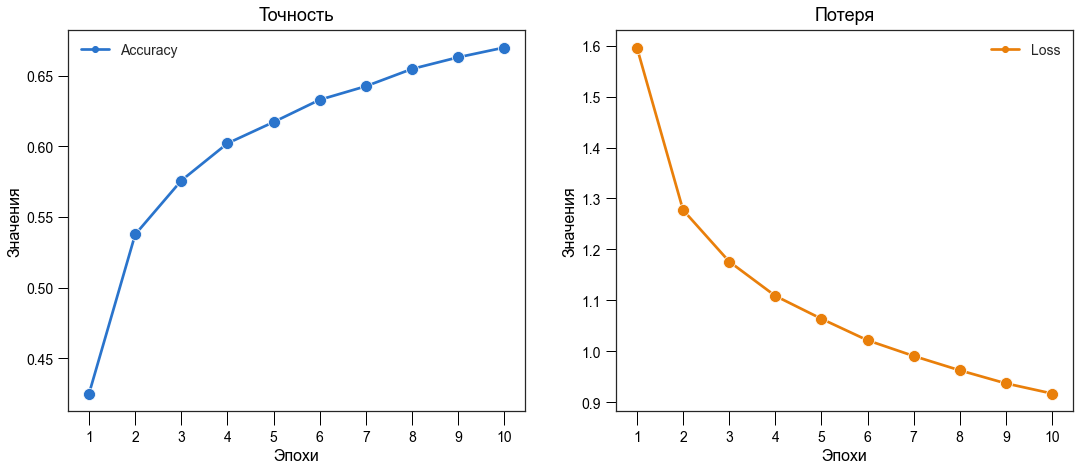

In [18]:
# Создание новой фигуры
fig = plt.figure(
    figsize = (18, 7) # Размер фигуры в дюймах
)

# Установка эстетических параметров
sns.set(
    style = 'white', # Стиль
    palette = 'muted', # Пальтра
    color_codes = True,
    rc = {'lines.linewidth': 2.7}
)
sns.despine(left = True)

cols = 2 # Количество столбцов
rows = 1 # Количество строк

titles = ['Точность', 'Потеря']
legends = ['upper left', 'upper right']
colors = ['#2A74CC', '#E97F0A']

df = pd.DataFrame({
    'Accuracy': history.history['accuracy'],
    'Loss': history.history['loss'],
})

epochs = range(len(df['Accuracy'])) # Количество эпох

columns = df.columns.tolist() # Список заголовков столбцов

len_columns = int(len(columns) / 2) # Количество графиков на каждой оси

cnt = 0 # Счетчик

# Проход по всем строкам
for i in range(0, rows):
    # Проход по всем столбцам
    for j in range(0, cols):
        # Создание оси в определенном месте внутри регулярной сетки
        ax = pylab.subplot2grid((rows, cols),(i, j))
        
        df_slice = df.loc[:, columns[cnt:len_columns]] # Срез
        
        # Увеличение счетчиков для среза
        cnt += len_columns
        len_columns += len_columns
        
        palette = sns.color_palette([colors[j]]) # Цвет
    
        # Линейный график
        ax = sns.lineplot(data = df_slice, dashes = False, markers = ['o'], markersize = 12, palette = palette)
    
        ax.set_xticks(epochs) # Количество отчетов
        ax.set_xticklabels(range(1, len(epochs) + 1)) # Эпохи в верном диапазоне
        
        # Заголовок осей
        ax.set_title(
            label = titles[j], # Заголовок
            fontdict = {
                'fontsize': 18, # Размер заголовка
                'color': '#000000' # Цвет заголовка
            },
            pad = 10 # Отступ заголовка от вершины осей
        )
        
        # Изменение внешнего вида меток
        ax.tick_params(
            axis = 'x', # Ось
            direction = 'out', # Расположение линий меток
            length = 14, # Длина линий меток
            width = 1, # Ширина линий меток 
            color = '#000000', # Цвет линий меток
            pad = 5, # Расстояние между линиями меток и метками
            labelsize = 14, # Размер метки
            labelcolor = '#000000', # Цвет метки
            bottom = True,  # Рисование линий меток
        )
        ax.tick_params(
            axis = 'y', # Ось
            direction = 'out', # Расположение линий меток
            length = 10, # Длина линий меток
            width = 1, # Ширина линий меток 
            color = '#000000', # Цвет линий меток
            pad = 5, # Расстояние между линиями меток и метками
            labelsize = 14, # Размер метки
            labelcolor = '#000000', # Цвет метки
            left = True  # Рисование линий меток
        )
        
        # Изменение внешнего вида меток данных
        ax.set_xlabel(
            'Эпохи',
            fontsize = 16, # Размер метки
            fontdict = {
                'color': '#000000' # Цвет метки
            },
            labelpad = 4 # Отступ

        )
        ax.set_ylabel(
            'Значения',
            fontsize = 16, # Размер метки
            fontdict = {
                'color': '#000000' # Цвет метки
            },
            labelpad = 4 # Отступ
        )
        
        ax.legend(loc=legends[j], frameon = False, fontsize = 14)

### Проверка работы модели на тестовой выборке

In [19]:
eval_test = model.evaluate(
    test_generator
)

eval_test_d = {
    'test_loss': [eval_test[0]],
    'test_accuracy': [eval_test[1]]}

df_eval_test = pd.DataFrame(data = eval_test_d).round(3).astype(str)

df_eval_test.head(None).style.hide_index() # Отображение первых N строк или все если указать None

10000/10000 [==============================] - 8s 800us/step - loss: 0.7424 - accuracy: 0.7280


test_loss,test_accuracy
0.742,0.728


### Получение вероятностей

In [20]:
# Предсказания для тестового набора данных
probabilities = model.predict(test_images_f)
predicted_classes = model.predict_classes(test_images_f)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


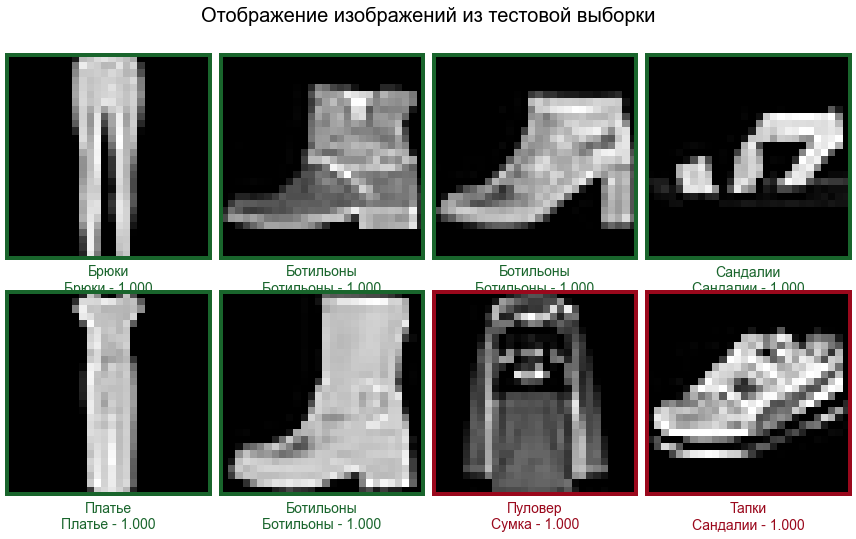

In [21]:
nrows = 2 # Количество строк
ncols = 4 # Количество столбцов

counts = 8 # Количество случайных значений из тестового набора данных

fig = plt.gcf() # Создание фигуры
fig.set_size_inches(ncols * 3, nrows * 3.7) # Установка размера фигуры в дюймах

next_pix = random.sample(range(0, len(test_images)), counts) # Случайные номера изображений из тестового набора

mpl.rcParams['axes.linewidth'] = 4 # Толщина рамки

for i, num in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)

    t = titles_data[test_labels[num]] # Верный класс
    pred = titles_data[predicted_classes[num]] # Предполагаемый класс
    prob = np.around(probabilities[num].max(), 3) # Вероятность предполагаемого класса
    
    plt.imshow(test_images[num], cmap = 'gray')
    
    if predicted_classes[num] != test_labels[num]:
        border_color = '#9A081C'
    else:
        border_color = '#19652C'
        
    plt.title('{}\n{} - {:.3f}'.format(t, pred, prob), y = -0.20, fontsize = 14, color = border_color)
    
    plt.setp(sp.spines.values(), color = border_color) # Цвет рамки
    
    # Скрытие осей
    plt.setp(sp.get_xticklabels(), visible = False)
    plt.setp(sp.get_yticklabels(), visible = False)

plt.suptitle(
    'Отображение изображений из тестовой выборки', # Заголовок
    fontsize = 20, # Размер заголовка
    fontdict = {
        'color': '#000000' # Цвет заголовка
    },
    y = 0.982 # Отступ заголовка от вершины осей
)

plt.tight_layout(pad = 0.9) # Установка расстояния между осями

plt.show() # Отображение фигуры

### Получение вероятностей, что определенное изображение в тестовом наборе данных является каждым из 10 классов

In [22]:
classifications = model.predict(test_images_f) # Предсказания для тестового набора данных

classifications = np.around(classifications, 3) # Округление предсказаний

num = 4 # Номер изображения в тестовом наборе данных

# Отображение в DataFrame
df_classifications = pd.DataFrame(data = classifications[num]).transpose() # Вероятности
df_classifications.head(None) # Отображение первых N строк или все если указать None

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
